In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.ticker as mtick
%matplotlib inline


In [2]:
#pip install --user mca

In [3]:
#!pip install missingno

In [4]:
#read file
data = pd.read_excel ('socioeconomic.xlsx', sheet_name='SocioeconomicData')

In [5]:
data.shape

(31379, 55)

In [6]:
pd.set_option('display.max_columns', None)


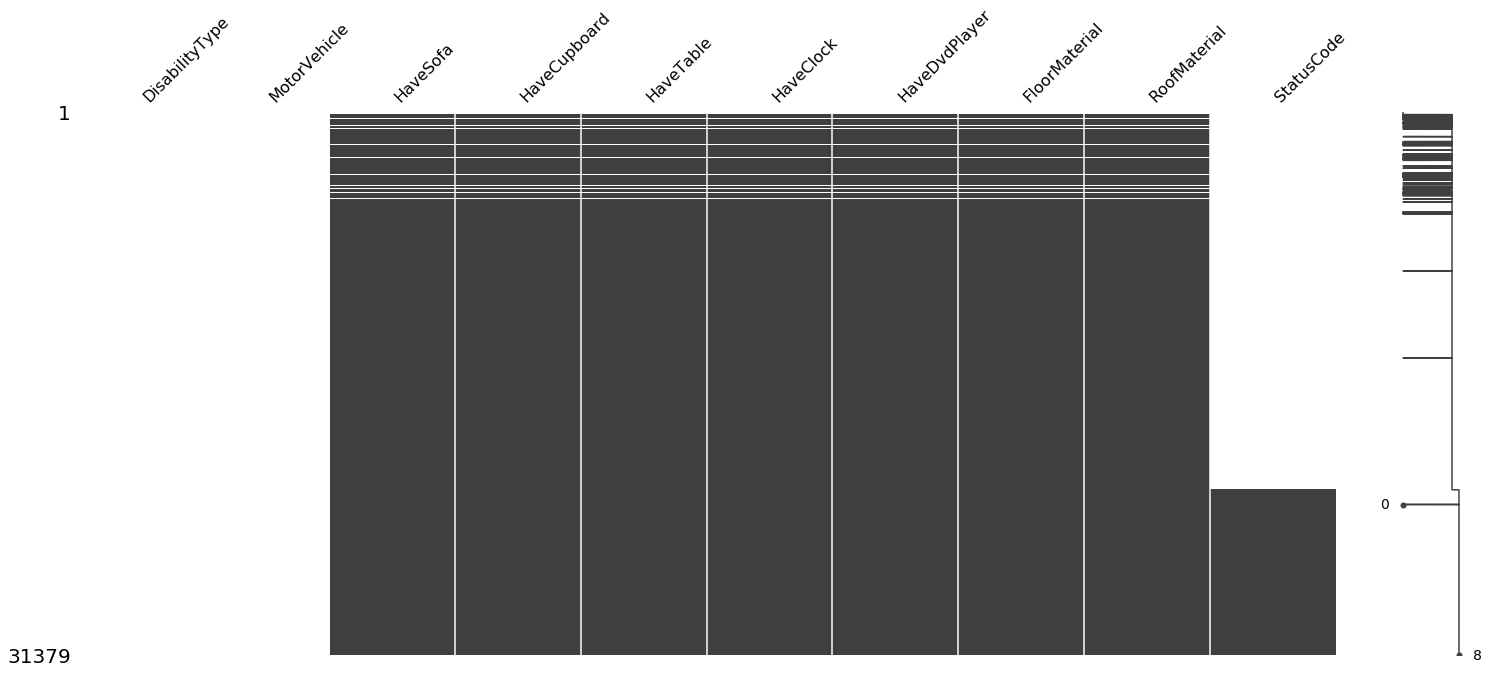

In [7]:
#checking for empty columns
data_df=data.columns[data.isnull().any()].tolist()
msno.matrix(data[data_df])

In [8]:
#data.isnull().sum()

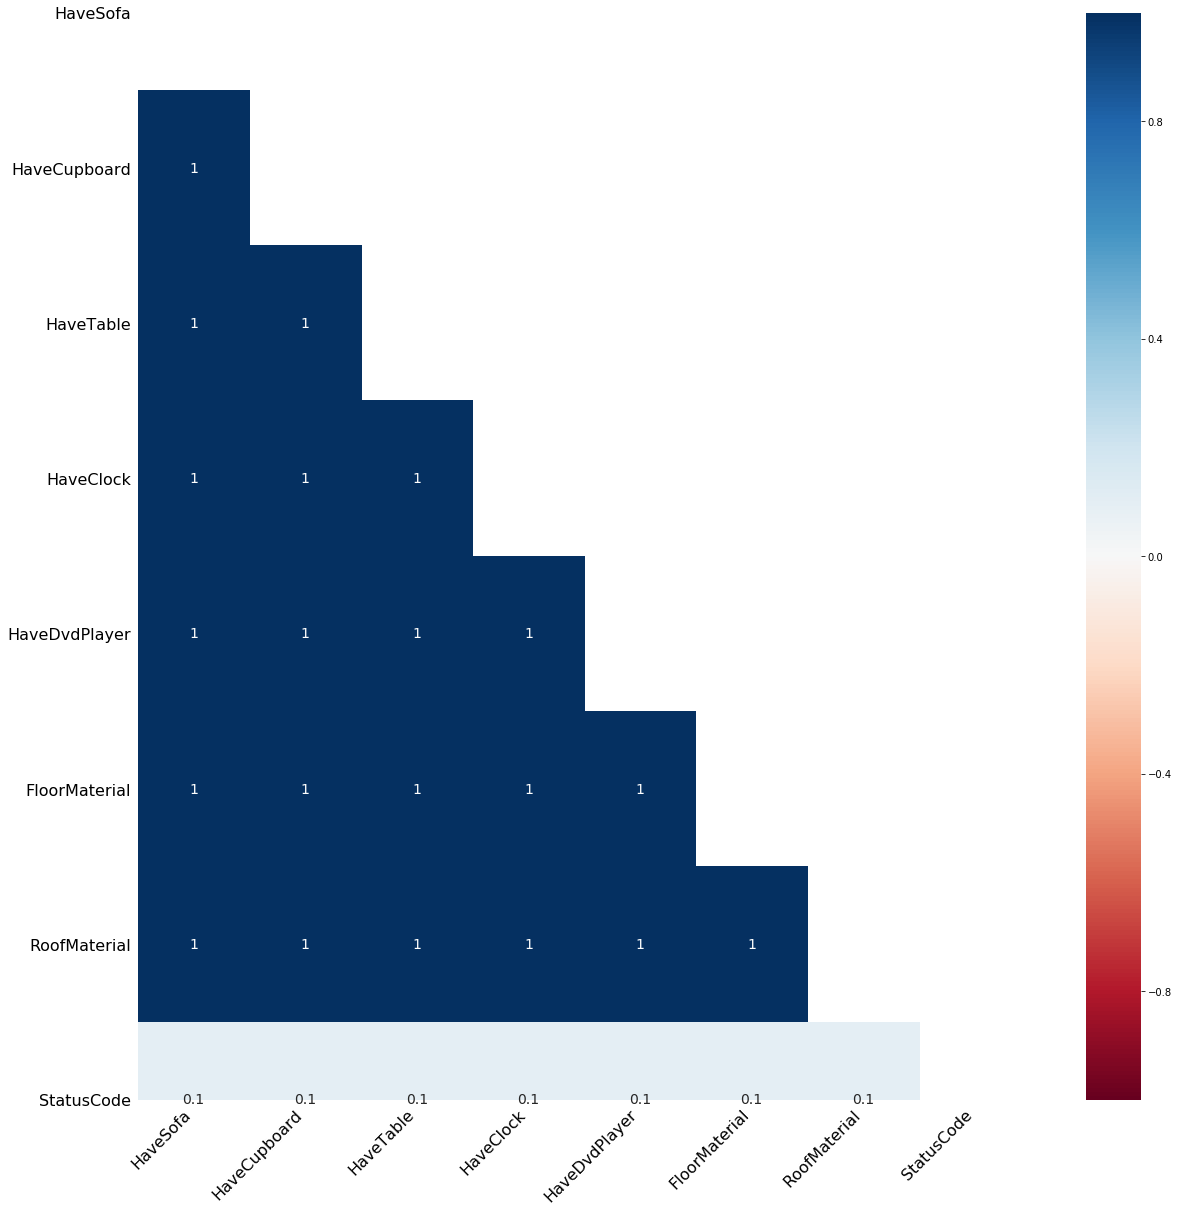

In [9]:
#plot empty columns on a heatmap
msno.heatmap(data[data_df], figsize=(20,20))

In [10]:
#print rows with empty cells
data_df

['DisabilityType',
 'MotorVehicle',
 'HaveSofa',
 'HaveCupboard',
 'HaveTable',
 'HaveClock',
 'HaveDvdPlayer',
 'FloorMaterial',
 'RoofMaterial',
 'StatusCode']

In [11]:
data.shape

(31379, 55)

In [12]:
#drop columns that are 60% empty
threshold=len(data)* 0.4
data.dropna(thresh=threshold ,axis=1 ,inplace=True)
#drop columns with any missing values
#data=data.dropna(axis=1)

In [13]:
#data['HaveSofa','HaveCupboard'].fillna('No', inplace=True)
data.fillna({'HaveSofa':'No', 'HaveCupboard':'No','HaveTable':'No','HaveClock':'No','HaveDvdPlayer':'No'}, inplace=True)


In [14]:
#check for duplicate records
data.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
31374    False
31375    False
31376    False
31377    False
31378    False
Length: 31379, dtype: bool

In [15]:
#check for any empty cells
#data.isnull().sum()

In [16]:
data=data.dropna(axis=1)

In [17]:
#check for unique values in each column to see wrong entries
for col in list(data):
    print(col)
    print(np.sort(data[col].unique()))

SocioEconomicId
[   12    13    14 ... 32884 32885 32886]
Gender
['Female' 'Male']
EducationLevel
['College' 'None' 'Primary' 'Secondary' 'University'
 'Vocational Training/Polytechnic']
EmpStatus
['Employed' 'Formal' 'Informal' 'Self Employed' 'Unemployed'
 'Unemployed/None']
AvrgIncome
[    0  2500  5000 10000]
Disabled
['No' 'Yes']
AnyDisabledMembers
['No' 'Yes']
MembersOverSeventy
[   0    1    2    3    4    5    6    7    8    9   10   20   29   30
   45   63   65   70   71   72   73   75   77   83 1001]
MembersOverSixtyFive
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  17  20  25  48
  60  63  64  65  66  67  68  70  72 200]
MembersPregnant
[ 0  1  2  3  4  5  6  8 10 11 67]
ChildrenBelowOne
[ 0  1  2  3  4  5  6  8 10 22]
Orphans
[     0      1      2      3      4      5      6      7      8      9
     10     11     12     13     18     22     23     24     25     32
     37     40     45     50     64    128    192    200    219    300
    320    436    500    59

In [18]:
#categorise MembersOverSeventy
OverSeventy=[]
for value in data['MembersOverSeventy']:
    if value==1 or value==70 or value==73 or value==83 or value==72 or value==77 or value==71 or value==75:
        OverSeventy.append('Yes')
    else:
        OverSeventy.append('No')
        
data['MembersOverSeventy']=OverSeventy


In [19]:
#categorise MembersOverSixtyFive
OverSixtyFive=[]
for value in data['MembersOverSixtyFive']:
    if value==1 or value==65 or value==63 or value==67 or value==68:
        OverSixtyFive.append('Yes')
    else:
        OverSixtyFive.append('No')
data['MembersOverSixtyFive']=OverSixtyFive


In [20]:
#categorise MembersPregnant
Pregnant=[]
for value in data['MembersPregnant']:
    if value==1:
        Pregnant.append('Yes')
    else:
        Pregnant.append('No')
data['MembersPregnant']=Pregnant
data['MembersPregnant'].value_counts()

No     30323
Yes     1056
Name: MembersPregnant, dtype: int64

In [21]:
#categorise ChildrenBelowOne
BelowOne=[]
for value in data['ChildrenBelowOne']:
    if value==1 or value==2 or value==3 or value==4:
        BelowOne.append('Yes')
    else:
        BelowOne.append('No')
data['ChildrenBelowOne']=BelowOne


In [22]:
#categorise Orphans
Orphanscategory=[]
for value in data['Orphans']:
    if value==1:
        Orphanscategory.append('Yes')
    else:
        Orphanscategory.append('No')
data['Orphans']=BelowOne


In [23]:
#change wrong entries for EmpStatus
data['EmpStatus'].unique()
data['EmpStatus'] = data['EmpStatus'].str.replace('Formal','Employed')
data['EmpStatus'] = data['EmpStatus'].str.replace('Informal','Self Employed')
data['EmpStatus'] = data['EmpStatus'].str.replace('Unemployed/None','Unemployed')
data.EmpStatus.unique()

array(['Self Employed', 'Employed', 'Unemployed'], dtype=object)

In [24]:
#change Bicycle 1 and 2 to Yes and 0 to No
data['Bicycle'] = data['Bicycle'].str.replace('1','Yes')
data['Bicycle'] = data['Bicycle'].str.replace('2','Yes')
data['Bicycle'] = data['Bicycle'].str.replace('0','No')
data['Bicycle'].unique()


array(['Yes', 'No'], dtype=object)

In [25]:
#change Fridge 1 and 2 to Yes and 0 to No
data['Fridge'] = data['Fridge'].str.replace('1','Yes')
data['Fridge'] = data['Fridge'].str.replace('0','No')
data['Fridge'].unique()


array(['No', 'Yes'], dtype=object)

In [26]:
#change Radio 1 and 2 to Yes and 0 to No
data['Radio'] = data['Fridge'].str.replace('1','Yes')
data['Radio'] = data['Fridge'].str.replace('0','No')
data['Radio'] = data['Fridge'].str.replace('2','Yes')
data['Radio'].unique()


array(['No', 'Yes'], dtype=object)

In [27]:
#change Beds 0 to No and the rest to Yes
data['Beds'] = data['Beds'].str.replace('1','Yes').replace('2','Yes').replace('3','Yes').replace('4','Yes').replace('5','Yes').replace('6','Yes').replace('7','Yes').replace('7','Yes').replace('9','Yes')
data['Beds'] = data['Beds'].str.replace('0','No')
data['Beds'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
#change Tv 0 to No and the rest to Yes
data['Tv'] = data['Tv'].str.replace('1','Yes')
data['Tv'] = data['Tv'].str.replace('0','No')
data['Tv'] = data['Tv'].str.replace('2','Yes')
data['Tv'].unique()


array(['No', 'Yes'], dtype=object)

In [29]:
data['OutodoorType'] = data['OutdoorType'].str.replace('--select--','Null')
data['OutodoorType'].unique()

array(['Iron Sheet', 'Wooden', 'Stone', 'Null', 'Mud'], dtype=object)

In [30]:
#sum FoodExpenditure','EducationExpenditure', 'MedicationExpenditure', 'AirtimeExpenditure','UtilityExpenditure'
data['TotalExpenditure']=data.loc[:,['FoodExpenditure',
                                     'EducationExpenditure', 'MedicationExpenditure', 
                                     'AirtimeExpenditure','UtilityExpenditure']].sum(axis=1)


In [31]:
#form income brackets
incomebrackets=[]
for value in data['AvrgIncome']:
    if value <2500:
        incomebrackets.append('<2500')
    elif value<4999:
        incomebrackets.append('2500-4999')
    elif value<9999:
        incomebrackets.append('2500-9999')
    elif value<14999:
        incomebrackets.append('10000-14999')
    else:
        incomebrackets.append('15000+')
data['IncomeBrackets']=incomebrackets



In [32]:
#form landownership brackets
landbrackets=[]
for value in data['Landsize']:
    if value==0:
        landbrackets.append('No Land')
    elif value==1:
        landbrackets.append('1 Acre')
    elif value>1 and value<6:
        landbrackets.append('2-5 Acres')
    elif value>5 and value<11:
        landbrackets.append('6-10 Acres')
    else:
        landbrackets.append('15000+ Acres')
data['LandSizeBrackets']=landbrackets


In [33]:
#form cowownership brackets
cowbrackets=[]
for value in data['Cows']:
    if value==0:
        cowbrackets.append('No Cows')
    elif value>1 and value<6:
        cowbrackets.append('1-5 Cows')
    elif value>5 and value<21:
        cowbrackets.append('6-20 Cows')
    else:
        cowbrackets.append('20+ Cows')
data['CowsOwnershipBrackets']=cowbrackets

In [34]:
#form goatsownership brackets
goatbrackets=[]
for value in data['Goats']:
    if value==0:
        goatbrackets.append('No Goats')
    elif value>1 and value<11:
        goatbrackets.append('1-10 Goats')
    elif value>10 and value<51:
        goatbrackets.append('11-50 Goats')
    else:
        goatbrackets.append('50+ Goats')
data['GoatOwnershipBrackets']=goatbrackets

In [35]:
#form goatsownership brackets
sheepbrackets=[]
for value in data['Sheep']:
    if value==0:
        sheepbrackets.append('No Sheep')
    elif value>1 and value<11:
        sheepbrackets.append('1-10 Sheep')
    elif value>10 and value<51:
        sheepbrackets.append('11-50 Sheep')
    else:
        sheepbrackets.append('50+ Sheep')
data['SheepOwnershipBrackets']=sheepbrackets

In [36]:
#form chickensownership brackets
chickenbrackets=[]
for value in data['Chicken']:
    if value<18.5:
        chickenbrackets.append('No Chicken')
    elif value>0 and value<21:
        chickenbrackets.append('1-20 Chicken')
    elif value>19 and value<51:
        chickenbrackets.append('20-50 Chicken')
    else:
        chickenbrackets.append('50+ Chicken')
data['ChickenOwnershipBrackets']=chickenbrackets

In [37]:
#form donkeyownership brackets
donkeybrackets=[]
for value in data['Donkey']:
    if value==0:
        donkeybrackets.append('No Donkeys')
    elif value>1 and value<6:
        donkeybrackets.append('1-5 Donkeys')
    elif value>5 and value<21:
        donkeybrackets.append('6-20 Donkeys')
    else:
        donkeybrackets.append('20+ Donkeys')
data['DonkeyOwnershipBrackets']=donkeybrackets

In [38]:
#form camelownership brackets
camelbrackets=[]
for value in data['Camel']:
    if value==0:
        camelbrackets.append('No Camels')
    elif value>1 and value<6:
        camelbrackets.append('1-5 Camels')
    elif value>5 and value<21:
        camelbrackets.append('6-20 Camels')
    else:
        camelbrackets.append('20+ Camels')
data['CamelOwnershipBrackets']=camelbrackets

**Group data by SocioEconomicId for easier retrieval**

In [39]:
# groupby SocioEconomicId to retrieve all data(all animals owned)
df_groups=data.groupby('SocioEconomicId')

In [40]:
#import IPython
#meth=[method_name for method_name in dir(df_groups)
    # if callable (getattr(df_groups,method_name)) & ~ method_name.startswith('_')]
#print[IPython.utils.text.columnize(meth)]

In [41]:
#df_groups.groups
#retrieve records by SocioEconomicId
#df_groups.get_group(12)

**Descriptive Analysis**

**Demographic Data**

In [42]:
frequency=data['Gender'].value_counts()
percent=data['Gender'].value_counts(normalize=True)*100
plot=pd.DataFrame({'Frequency':frequency,'Percentage':percent})
plot.reset_index(level=0,inplace=True)
plot.rename(columns={'index':'Category'},inplace=True)

plot.head()

,Category,Frequency,Percentage
0,Male,19693,62.758533
1,Female,11686,37.241467


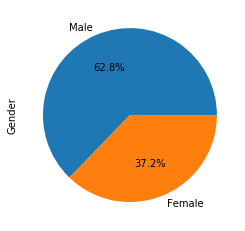

In [43]:
data['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')


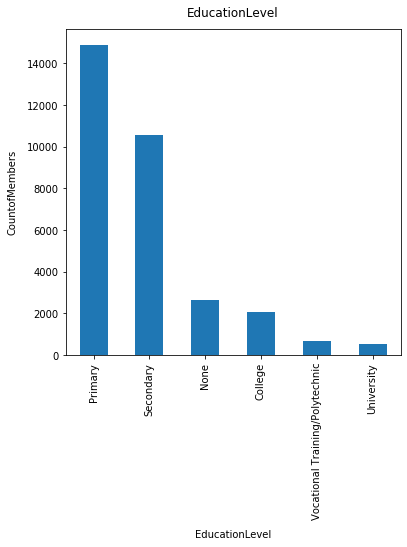

In [44]:
data['EducationLevel'].value_counts().plot(kind='bar', figsize=(6, 6))
plt.xlabel("EducationLevel", labelpad=10)
plt.ylabel("CountofMembers", labelpad=10)
plt.title("EducationLevel", y=1.02);

In [45]:
#group by educationlevel and Gender and count values in each category
data.groupby(["EducationLevel", "Gender"])["Gender"].count()

EducationLevel                   Gender
College                          Female     698
                                 Male      1355
None                             Female    1737
                                 Male       921
Primary                          Female    5489
                                 Male      9408
Secondary                        Female    3483
                                 Male      7081
University                       Female     125
                                 Male       393
Vocational Training/Polytechnic  Female     154
                                 Male       535
Name: Gender, dtype: int64

**FamilyMember Data**

In [46]:
frequency70=data['MembersOverSeventy'].value_counts()
percent70=data['MembersOverSeventy'].value_counts(normalize=True)*100

frequency65=data['MembersOverSixtyFive'].value_counts()
percent65=data['MembersOverSixtyFive'].value_counts(normalize=True)*100

frequencypreg=data['MembersPregnant'].value_counts()
percentpreg=data['MembersPregnant'].value_counts(normalize=True)*100

frequencyorphans=data['Orphans'].value_counts()
percentorphans=data['Orphans'].value_counts(normalize=True)*100

frequencydisabledmem=data['AnyDisabledMembers'].value_counts()
percentdisabledmem=data['AnyDisabledMembers'].value_counts(normalize=True)*100

frequencydisabledhead=data['Disabled'].value_counts()
percentdisabledhead=data['Disabled'].value_counts(normalize=True)*100

plot=pd.DataFrame({'OverSeventyFrequency':frequency70,'OverSeventy%':percent70,
                   'OverSixtyFiveFrequency':frequency65,'OverSixtyFive%':percent65,
                   'Pregnant':frequencypreg,'Pregnant%':percentpreg,
                   'Orphans':frequencyorphans,'Orphans%':percentorphans,
                   'DisabledMembers':frequencydisabledmem,'DisabledMembers%':percentdisabledmem,
                   'DisabledHead':frequencydisabledhead,'DisabledHead%':percentdisabledhead,
                   
                   })
plot.reset_index(level=0,inplace=True)
plot.rename(columns={'index':'Category'},inplace=True)

plot.head()

,Category,OverSeventyFrequency,OverSeventy%,OverSixtyFiveFrequency,OverSixtyFive%,Pregnant,Pregnant%,Orphans,Orphans%,DisabledMembers,DisabledMembers%,DisabledHead,DisabledHead%
0,No,28002,89.238025,27948,89.065936,30323,96.634692,28159,89.73836,30544,97.338985,30079,95.857102
1,Yes,3377,10.761975,3431,10.934064,1056,3.365308,3220,10.26164,835,2.661015,1300,4.142898


**Economic Status**

In [47]:
#group by educationlevel and Gender and count values in each category
data.groupby(["EmpStatus"])["AvrgIncome"].mean()

EmpStatus
Employed         3484.238766
Self Employed    3559.904602
Unemployed       1670.175915
Name: AvrgIncome, dtype: float64

**Housing**

In [48]:
#housingtype distributions
housingtype=data['HousingType'].value_counts()
percenthousingtype=data['HousingType'].value_counts(normalize=True)*100

plot=pd.DataFrame({'HousingTypeCount':housingtype,'HousingType%':percenthousingtype })

plot.reset_index(level=0,inplace=True)
plot.rename(columns={'index':'Category'},inplace=True)

plot.head()

,Category,HousingTypeCount,HousingType%
0,Wooden,17240,54.941203
1,Mud/Iron Sheet,7078,22.556487
2,Stone/Iron Sheet,5105,16.268842
3,Stone/Tiles,1025,3.266516
4,Mud/Grass Thatched,438,1.395838


In [49]:
# LightingSource Distributions
lightingsource=data['LightingSource'].value_counts()
percentlightingsource=data['LightingSource'].value_counts(normalize=True)*100

plot=pd.DataFrame({'LightingSourceCount':lightingsource,'LightingSource%':percentlightingsource})

plot.reset_index(level=0,inplace=True)
plot.rename(columns={'index':'Category'},inplace=True)

plot.head()

,Category,LightingSourceCount,LightingSource%
0,Electricity,12324,39.274674
1,Solar,10541,33.592530
2,Kerosine Lamp,6461,20.590204
3,Koroboi,1808,5.761815
4,Other,157,0.500335


In [50]:
#CookingSource Distributions
cookingsource=data['CookingFuelSource'].value_counts()
percentcookingsource=data['CookingFuelSource'].value_counts(normalize=True)*100

plot=pd.DataFrame({'CookingSourceCount':cookingsource,'CookingSource%':percentcookingsource})

plot.reset_index(level=0,inplace=True)
plot.rename(columns={'index':'Category'},inplace=True)

plot.head()

,Category,CookingSourceCount,CookingSource%
0,Firewood,22224,70.824437
1,Charcoal,6117,19.493929
2,Gas Cooker,2562,8.164696
3,Electricity,297,0.946493
4,Other,129,0.411103


In [51]:
#WaterSource Distributions
watersource=data['WaterSource'].value_counts()
percentwatersource=data['WaterSource'].value_counts(normalize=True)*100

plot=pd.DataFrame({'WaterSourceCount':watersource,'WaterSource%':percentwatersource})

plot.reset_index(level=0,inplace=True)
plot.rename(columns={'index':'Category'},inplace=True)

plot.head()

,Category,WaterSourceCount,WaterSource%
0,Piped Water,10785,34.370120
1,River,7477,23.828038
2,Well,5314,16.934893
3,Borehole,5060,16.125434
4,Rain Water/Water Tank,1667,5.312470


In [52]:
#plot for floormaterial and roofmaterial after imputations


In [53]:
data

,SocioEconomicId,Gender,EducationLevel,EmpStatus,AvrgIncome,Disabled,AnyDisabledMembers,MembersOverSeventy,MembersOverSixtyFive,MembersPregnant,ChildrenBelowOne,Orphans,LightingSource,CookingFuelSource,FoodExpenditure,EducationExpenditure,MedicationExpenditure,AirtimeExpenditure,UtilityExpenditure,HousingType,FunctionalLatrine,OutdoorType,SafeWater,WaterSource,TreatedWater,Handwashing,RefuseDisposal,Bicycle,Fridge,Beds,Radio,Tv,HaveVehicle,Landsize,Cows,Goats,Sheep,Donkey,Chicken,Camel,SocioNumber,CollectionDate,HaveSofa,HaveCupboard,HaveTable,HaveClock,HaveDvdPlayer,CountyName,SubCountyName,communityHealthUnitName,OutodoorType,TotalExpenditure,IncomeBrackets,LandSizeBrackets,CowsOwnershipBrackets,GoatOwnershipBrackets,SheepOwnershipBrackets,ChickenOwnershipBrackets,DonkeyOwnershipBrackets,CamelOwnershipBrackets
0,12,Male,Primary,Self Employed,0,No,No,No,No,No,No,No,Solar,Firewood,3000,0,3000,10,300,Wooden,Yes,Iron Sheet,Yes,Piped Water,Yes,No,No,Yes,No,Yes,No,No,No,1,0,1,0,0,3,0,SOCIO31123454637,2018-10-23 11:47:56,No,No,No,No,No,Laikipia,Laikipia North,Lakipia 1,Iron Sheet,6310,<2500,1 Acre,No Cows,50+ Goats,No Sheep,No Chicken,No Donkeys,No Camels
1,13,Female,Secondary,Self Employed,5000,No,No,No,No,No,No,No,Electricity,Firewood,3000,2500,500,50,300,Stone/Tiles,Yes,Iron Sheet,Yes,Borehole,No,No,Yes,No,No,Yes,No,Yes,No,0,0,1,1,0,8,0,SOCIO31123451337,2018-10-23 00:21:47,No,No,No,No,No,Laikipia,Laikipia North,Lakipia 1,Iron Sheet,6350,2500-9999,No Land,No Cows,50+ Goats,50+ Sheep,No Chicken,No Donkeys,No Camels
2,14,Male,Secondary,Self Employed,10000,No,No,No,No,No,No,No,Electricity,Firewood,7000,1000,1000,100,300,Stone/Iron Sheet,Yes,Iron Sheet,Yes,Borehole,No,No,No,No,No,Yes,No,Yes,No,0,4,0,18,0,7,0,SOCIO31123453007,2018-10-24 10:22:17,No,No,No,No,No,Laikipia,Laikipia North,Lakipia 1,Iron Sheet,9400,10000-14999,No Land,1-5 Cows,No Goats,11-50 Sheep,No Chicken,No Donkeys,No Camels
3,15,Female,Secondary,Employed,0,No,No,No,No,No,No,No,Solar,Firewood,700,4000,500,50,0,Wooden,Yes,Wooden,Yes,Rain Water/Water Tank,No,No,Yes,Yes,No,Yes,No,Yes,No,0,2,0,0,0,0,0,SOCIO31123455504,2018-10-24 11:18:08,No,No,No,No,No,Laikipia,Laikipia North,Lakipia 1,Wooden,5250,<2500,No Land,1-5 Cows,No Goats,No Sheep,No Chicken,No Donkeys,No Camels
4,16,Female,Primary,Self Employed,2500,No,No,No,No,No,No,No,Kerosine Lamp,Charcoal,3000,0,1000,10,0,Wooden,Yes,Iron Sheet,Yes,Rain Water/Water Tank,No,No,Yes,No,No,Yes,No,No,No,0,0,0,0,0,5,0,SOCIO31123455536,2018-10-24 11:35:38,No,No,No,No,No,Laikipia,Laikipia North,Lakipia 1,Iron Sheet,4010,2500-4999,No Land,No Cows,No Goats,No Sheep,No Chicken,No Donkeys,No Camels
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31374,32880,Male,Secondary,Unemployed,0,No,No,No,No,No,No,No,Solar,Firewood,1500,3000,30,200,300,Wooden,Yes,Wooden,Yes,Piped Water,No,No,No,Yes,No,Yes,No,No,No,2,2,0,0,0,25,0,SOCIO3107001676905745,2020-02-17 04:11:20,No,Yes,Yes,No,No,Laikipia,Laikipia West,Karaba,Wooden,5030,<2500,2-5 Acres,1-5 Cows,No Goats,No Sheep,20-50 Chicken,No Donkeys,No Camels
31375,32883,Male,Secondary,Unemployed,0,No,No,No,No,No,No,No,Solar,Firewood,500,3000,200,200,300,Wooden,Yes,Wooden,Yes,Piped Water,No,No,No,No,No,Yes,No,No,No,3,2,0,0,0,10,0,SOCIO3107001676906192,2020-02-20 12:04:31,No,Yes,Yes,No,No,Laikipia,Laikipia West,Karaba,Wooden,4200,<2500,2-5 Acres,1-5 Cows,No Goats,No Sheep,No Chicken,No Donkeys,No Camels
31376,32884,Female,Primary,Unemployed,0,No,No,No,No,No,No,No,Kerosine Lamp,Firewood,500,600,200,100,300,Wooden,Yes,Iron Sheet,Yes,Piped Water,No,No,No,No,No,Yes,No,No,No,2,1,0,0,0,15,0,SOCIO3107001676902174,2020-02-20 12:08:15,No,Yes,Yes,No,No,Laikipia,Laikipia West,Karaba,Iron Sheet,1700,<2500,2-5 Acres,20+ Cows,No Goats,No Sheep,No Chicken,No Donkeys,No Camels
31377,32885,Male,Secondary,Unemployed,0,No,No,No,No,No,N

In [54]:
#data.to_excel('/Users/venessachege/Documents/AmrefData/cleandatamca.xlsx', index = None, header=True)

In [55]:
 #Households surveyed in Laikipia
data[data["CountyName"]=='Laikipia'].count()["SocioEconomicId"]

26812

**MULTIPLE CORRESPONDENCE ANALYSIS**

In [56]:
#pip install --user prince

In [57]:
#!pip install factor_analyzer

In [58]:
import prince # for multiple correspondence analysis
from factor_analyzer import FactorAnalyzer

In [59]:
mcadf=pd.read_excel('/Users/venessachege/Documents/AmrefData/cleandatamca.xlsx')

In [60]:
# number of categorical features
print("Number of categorical features : {}".format(len(mcadf.select_dtypes(include=['object']).columns)))
print("Number of continuous features : {}".format(len(mcadf.select_dtypes(include=['int64', 'float64']).columns)))

Number of categorical features : 44
Number of continuous features : 15


In [61]:
#mcadf.nunique()

In [62]:

mcadf=mcadf.drop(['Gender','SocioEconomicId','AvrgIncome','FoodExpenditure', 'EducationExpenditure', 'MedicationExpenditure', 
                  'AirtimeExpenditure', 'UtilityExpenditure', 'Landsize', 'Cows', 'Goats', 'Sheep', 'Donkey', 'Chicken',
                  'Camel', 'SocioNumber', 'CollectionDate','TotalExpenditure','CountyName','SubCountyName','communityHealthUnitName'] ,axis=1)

In [63]:
mcadf

,EducationLevel,EmpStatus,Disabled,AnyDisabledMembers,MembersOverSeventy,MembersOverSixtyFive,MembersPregnant,ChildrenBelowOne,Orphans,LightingSource,CookingFuelSource,HousingType,FunctionalLatrine,OutdoorType,SafeWater,WaterSource,TreatedWater,Handwashing,RefuseDisposal,Bicycle,Fridge,Beds,Radio,Tv,HaveVehicle,HaveSofa,HaveCupboard,HaveTable,HaveClock,HaveDvdPlayer,OutodoorType,IncomeBrackets,LandSizeBrackets,CowsOwnershipBrackets,GoatOwnershipBrackets,SheepOwnershipBrackets,ChickenOwnershipBrackets,DonkeyOwnershipBrackets,CamelOwnershipBrackets
0,Primary,Self Employed,No,No,No,No,No,No,No,Solar,Firewood,Wooden,Yes,Iron Sheet,Yes,Piped Water,Yes,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,Iron Sheet,<2500,1 Acre,No Cows,50+ Goats,No Sheep,No Chicken,No Donkeys,No Camels
1,Secondary,Self Employed,No,No,No,No,No,No,No,Electricity,Firewood,Stone/Tiles,Yes,Iron Sheet,Yes,Borehole,No,No,Yes,No,No,Yes,No,Yes,No,No,No,No,No,No,Iron Sheet,2500-9999,No Land,No Cows,50+ Goats,50+ Sheep,No Chicken,No Donkeys,No Camels
2,Secondary,Self Employed,No,No,No,No,No,No,No,Electricity,Firewood,Stone/Iron Sheet,Yes,Iron Sheet,Yes,Borehole,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,Iron Sheet,10000-14999,No Land,1-5 Cows,No Goats,11-50 Sheep,No Chicken,No Donkeys,No Camels
3,Secondary,Employed,No,No,No,No,No,No,No,Solar,Firewood,Wooden,Yes,Wooden,Yes,Rain Water/Water Tank,No,No,Yes,Yes,No,Yes,No,Yes,No,No,No,No,No,No,Wooden,<2500,No Land,1-5 Cows,No Goats,No Sheep,No Chicken,No Donkeys,No Camels
4,Primary,Self Employed,No,No,No,No,No,No,No,Kerosine Lamp,Charcoal,Wooden,Yes,Iron Sheet,Yes,Rain Water/Water Tank,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,Iron Sheet,2500-4999,No Land,No Cows,No Goats,No Sheep,No Chicken,No Donkeys,No Camels
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31374,Secondary,Unemployed,No,No,No,No,No,No,No,Solar,Firewood,Wooden,Yes,Wooden,Yes,Piped Water,No,No,No,Yes,No,Yes,No,No,No,No,Yes,Yes,No,No,Wooden,<2500,2-5 Acres,1-5 Cows,No Goats,No Sheep,20-50 Chicken,No Donkeys,No Camels
31375,Secondary,Unemployed,No,No,No,No,No,No,No,Solar,Firewood,Wooden,Yes,Wooden,Yes,Piped Water,No,No,No,No,No,Yes,No,No,No,No,Yes,Yes,No,No,Wooden,<2500,2-5 Acres,1-5 Cows,No Goats,No Sheep,No Chicken,No Donkeys,No Camels
31376,Primary,Unemployed,No,No,No,No,No,No,No,Kerosine Lamp,Firewood,Wooden,Yes,Iron Sheet,Yes,Piped Water,No,No,No,No,No,Yes,No,No,No,No,Yes,Yes,No,No,Iron Sheet,<2500,2-5 Acres,20+ Cows,No Goats,No Sheep,No Chicken,No Donkeys,No Camels
31377,Secondary,Unemployed,No,No,No,No,No,No,No,Electricity,Firewood,Stone/Iron Sheet,Yes,Iron Sheet,Yes,Piped Water,Yes,Yes,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Iron Sheet,<2500,1 Acre,No Cows,No Goats,1-10 Sheep,No Chicken,No Donkeys,No Camels


/Users/venessachege/.local/lib/python3.7/site-packages/prince/one_hot.py:35: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=0
/Users/venessachege/opt/anaconda3/lib/python3.7/site-packages/pandas/core/sparse/frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),
/Users/venessachege/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3456: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseAr

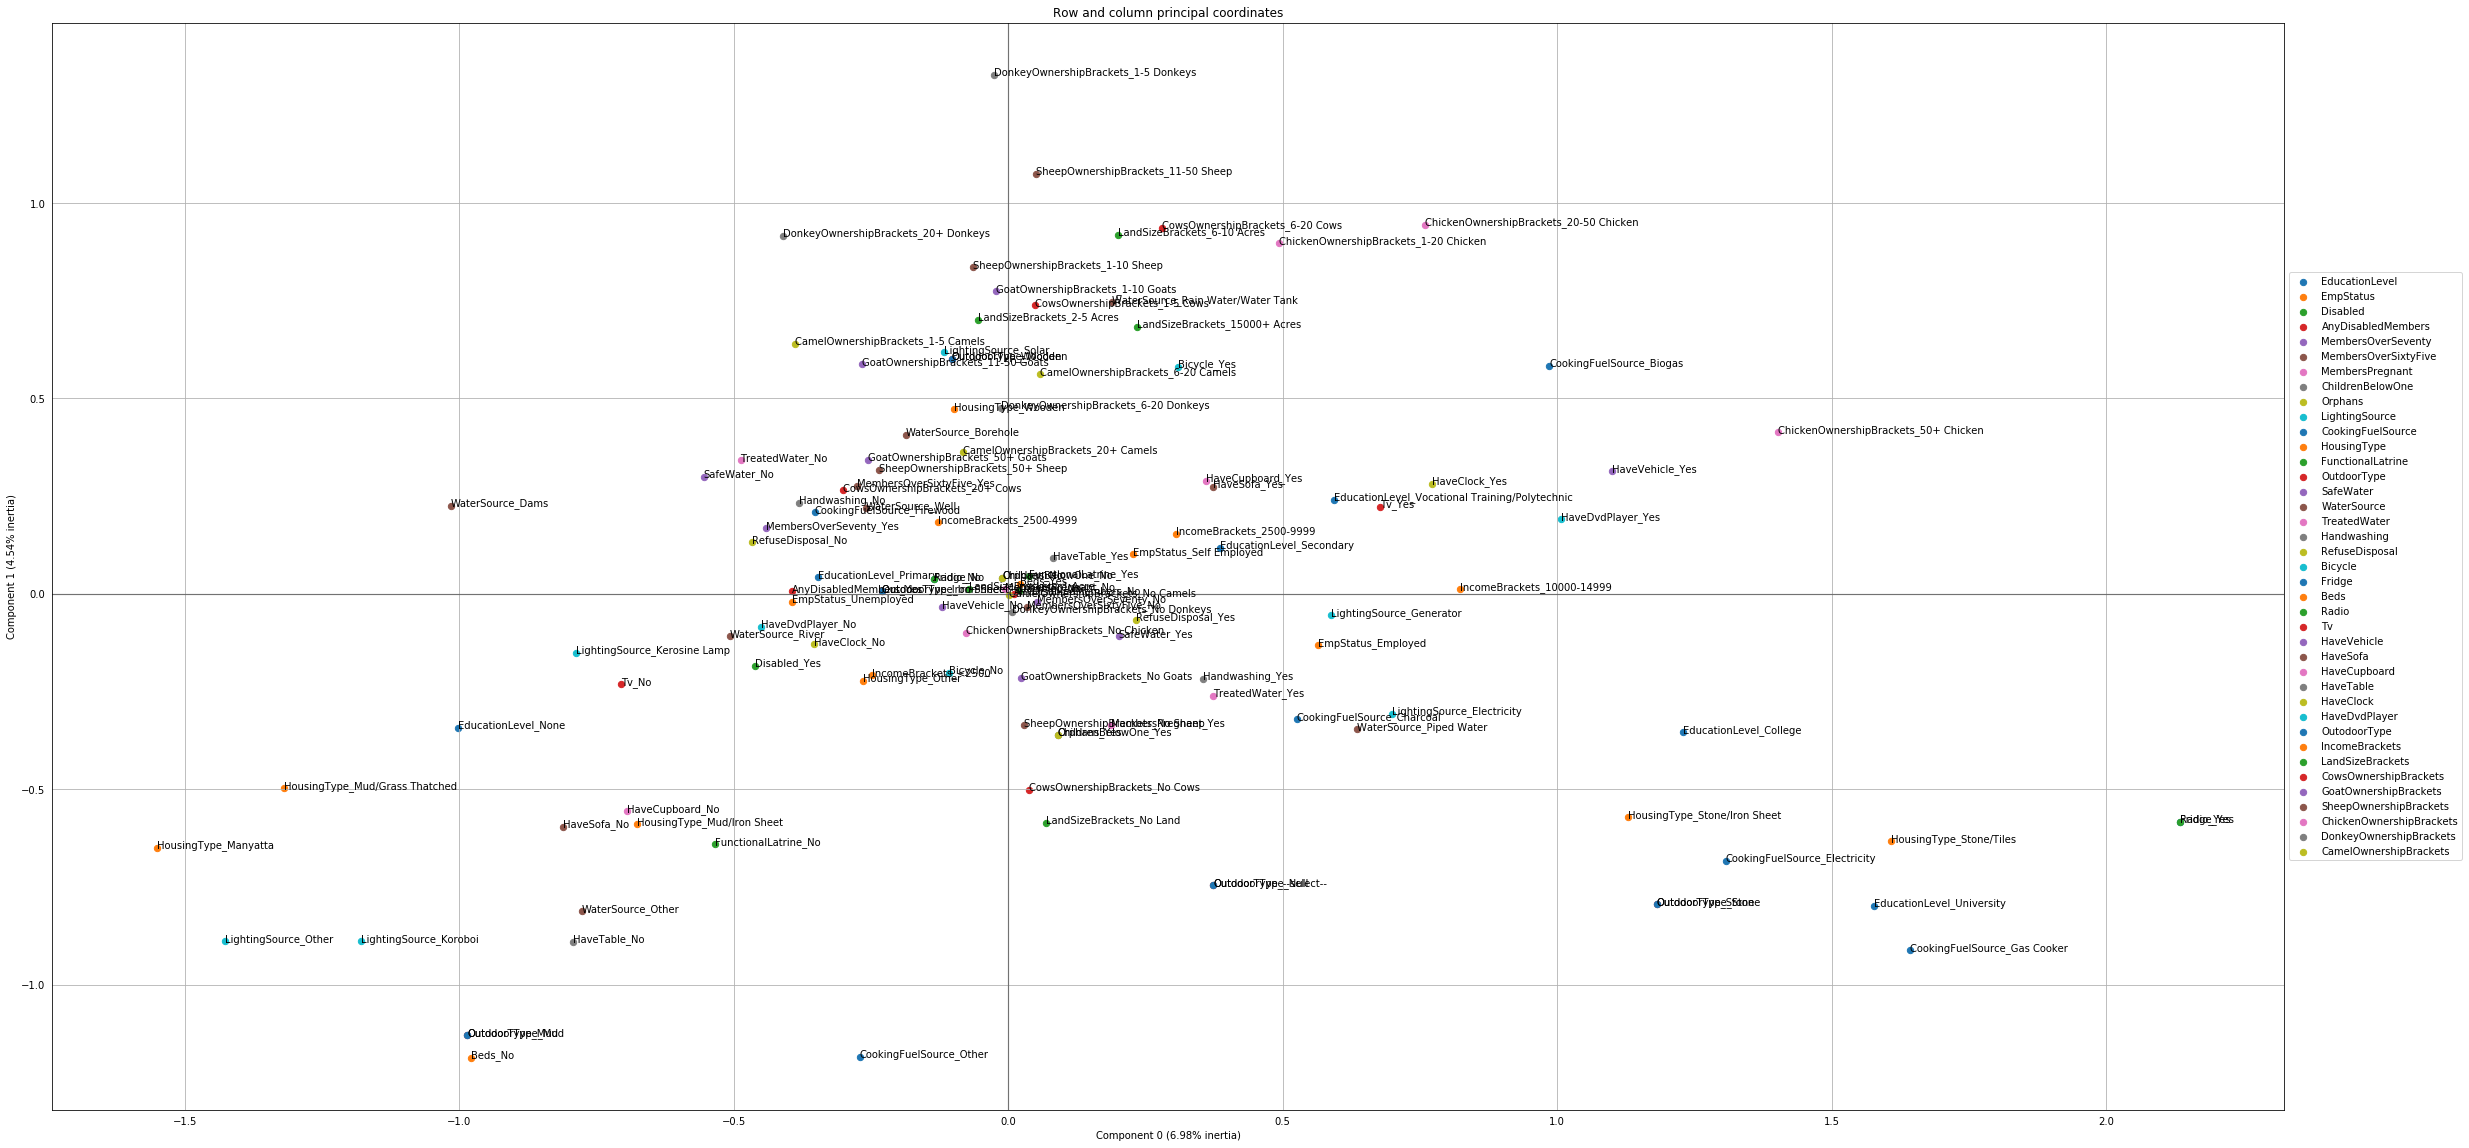

In [64]:
mca = prince.MCA(
        n_components=2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=42
        )
mca = mca.fit(mcadf)

ax = mca.plot_coordinates(
        X=mcadf,
        ax=None,
        figsize=(40, 20),
        show_row_points=False,
        row_points_size=0,
        show_row_labels=False,
        show_column_points=True,
        column_points_size=40,
        show_column_labels=True,
        legend_n_cols=1
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5))


**Subset Selection using the chi2 test stat for categorical features**

In [65]:
#get_dummies from the pandas library
mcadf_sub = pd.get_dummies(mcadf, drop_first=True)



In [66]:
#print("Features after get_dummies:\n", list(mcadf_sub.columns))

In [67]:
 #Get weighted value of each category
groups = {
   'Category #{}'.format(no+1): [c for c in mcadf_sub.columns ]
    for no in range(1)
 }  
#import pprint
#pprint.pprint(groups)
mfa = prince.MFA(
      groups=groups,
      n_components=2,
      n_iter=3,
      copy=True,
      check_input=True,
      engine='auto',
      random_state=42
)
mfa = mfa.fit(mcadf_sub)

In [68]:
#mfa.partial_row_coordinates(mcadf_sub)

In [69]:
mfa.column_correlations(mcadf_sub)

/Users/venessachege/.local/lib/python3.7/site-packages/prince/mfa.py:202: FutureWarning: DataFrame/Series.to_dense is deprecated and will be removed in a future version
  for feature in X_global.columns


,0,1
EducationLevel_None,-0.277069,-0.106968
EducationLevel_Primary,-0.381209,-0.016863
EducationLevel_Secondary,0.359935,0.109350
EducationLevel_University,0.164553,-0.059209
EducationLevel_Vocational Training/Polytechnic,0.080226,0.033552
...,...,...
DonkeyOwnershipBrackets_6-20 Donkeys,-0.002125,0.022876
DonkeyOwnershipBrackets_No Donkeys,0.053006,-0.191824
CamelOwnershipBrackets_20+ Camels,-0.005093,0.019210
CamelOwnershipBrackets_6-20 Camels,0.001485,0.026888
